In [1]:
import copy as cp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_dat = pd.read_csv('qPCR data combined 89 127 129 150 - Full.csv')

dat = raw_dat
dat = dat[['Hours','Line','Target_type','Target','IPTG','Replicate','Cp']]
dat.loc[ (dat['Line']=='pPC127') & (dat['Target']=='PI4K') ,'Line'] = 'PI4K (reg. PI3K)'
dat.loc[ (dat['Line']=='pPC129') & (dat['Target']=='PI3K') ,'Line'] = 'PI3K (reg. PI4K)'
dat.loc[ (dat['Line']=='PI3K_TD') & (dat['Target']=='PI4K') ,'Line'] = 'PI4K (reg. PI3K_TD)'
dat.loc[ (dat['Line']=='PI4K_TD') & (dat['Target']=='PI3K') ,'Line'] = 'PI3K (reg. PI4K_TD)'

add_rows_127 = cp.deepcopy( dat.loc[ (dat['Line']=='pPC127') & (dat['Target_type']=='Control') ,] )
add_rows_127['Line'] = 'PI4K (reg. PI3K)'
add_rows_129 = cp.deepcopy( dat.loc[ (dat['Line']=='pPC129') & (dat['Target_type']=='Control') ,] )
add_rows_129['Line'] = 'PI3K (reg. PI4K)'
add_rows_3KTD = cp.deepcopy( dat.loc[ (dat['Line']=='PI3K_TD') & (dat['Target_type']=='Control') ,] )
add_rows_3KTD['Line'] = 'PI4K (reg. PI3K_TD)'
add_rows_4KTD = cp.deepcopy( dat.loc[ (dat['Line']=='PI4K_TD') & (dat['Target_type']=='Control') ,] )
add_rows_4KTD['Line'] = 'PI3K (reg. PI4K_TD)'
dat = pd.concat([dat,add_rows_127,add_rows_129,add_rows_3KTD,add_rows_4KTD])

dat = dat.groupby(['Hours','Line','Target_type','Target','IPTG','Replicate']).mean().reset_index()

# dat = dat.pivot(index=['Hours','Line','IPTG','Target','Replicate'],columns='Target_type', values='Cp').reset_index()
dat = dat.pivot( index=['Hours','Line','IPTG','Replicate'], columns='Target_type', values='Cp' ).reset_index()

dat['dCp'] = dat['Target'] - dat['Control']
dat['Expression'] = np.power( 2, -dat['dCp'] )

dat


Target_type,Hours,Line,IPTG,Replicate,Control,Target,dCp,Expression
0,4,PI3K (reg. PI4K),0,1,13.503333,18.580000,5.076667,0.029633
1,4,PI3K (reg. PI4K),0,2,13.080000,18.280000,5.200000,0.027205
2,4,PI3K (reg. PI4K),0,3,13.206667,18.570000,5.363333,0.024293
3,4,PI3K (reg. PI4K),2,1,12.980000,18.490000,5.510000,0.021944
4,4,PI3K (reg. PI4K),2,2,12.593333,18.710000,6.116667,0.014411
...,...,...,...,...,...,...,...,...
181,72,pPC129,0,2,19.090000,24.136667,5.046667,0.030255
182,72,pPC129,0,3,19.133333,24.173333,5.040000,0.030395
183,72,pPC129,2,1,12.270000,17.943333,5.673333,0.019596
184,72,pPC129,2,2,12.960000,18.180000,5.220000,0.026830


/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_7914/2485995138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_72_TetR['IPTG'] = dat_72_TetR['IPTG'].replace(0,'0 nM aTc').replace(500,'500 nM aTc')


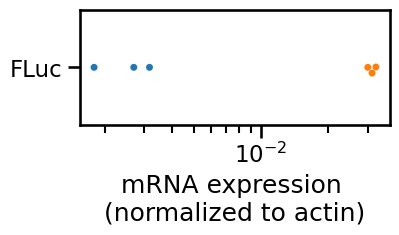

In [3]:
dat_72_TetR = dat.loc[ (dat['Hours']==72)&(dat['Line']=='pPC071'), ]
dat_72_TetR['IPTG'] = dat_72_TetR['IPTG'].replace(0,'0 nM aTc').replace(500,'500 nM aTc')
dat_72_TetR = dat_72_TetR.replace('pPC071','FLuc')

plt.figure(figsize=(4,1.5))
sns.set_context("talk")
ax = sns.swarmplot(dat_72_TetR,hue='IPTG',x='Expression',y='Line',orient='h')
plt.xscale('log')
plt.legend(loc = "lower right")
plt.ylabel('')
plt.xlabel('mRNA expression \n(normalized to actin)')
ax.get_legend().remove()

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_7914/3175073280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_72_LacI['IPTG'] = dat_72_LacI['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')


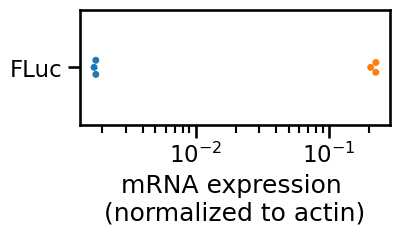

In [4]:
dat_72_LacI = dat.loc[ (dat['Hours']==72)&(dat['Line']=='pPC089'), ]
dat_72_LacI['IPTG'] = dat_72_LacI['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')
dat_72_LacI = dat_72_LacI.replace('pPC089','FLuc')

plt.figure(figsize=(4,1.5))
sns.set_context("talk")
ax = sns.swarmplot(dat_72_LacI,hue='IPTG',x='Expression',y='Line',orient='h')
plt.xscale('log')
plt.legend(loc = "lower right")
plt.ylabel('')
plt.xlabel('mRNA expression \n(normalized to actin)')
ax.get_legend().remove()

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_7914/3566062846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_48_k13['IPTG'] = dat_48_k13['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')


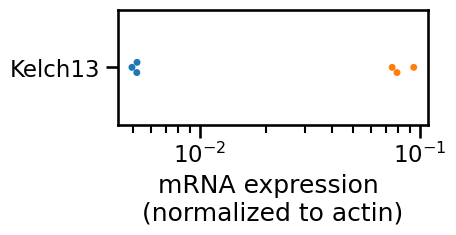

In [5]:
dat_48_k13 = dat.loc[ (dat['Hours']==48)&(dat['Line']=='pPC150'), ]
dat_48_k13['IPTG'] = dat_48_k13['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')
dat_48_k13 = dat_48_k13.replace('pPC150','Kelch13')

plt.figure(figsize=(4,1.5))
sns.set_context("talk")
ax = sns.swarmplot(dat_48_k13,hue='IPTG',x='Expression',y='Line',orient='h')
plt.xscale('log')
plt.legend(loc = "lower right")
plt.ylabel('')
plt.xlabel('mRNA expression \n(normalized to actin)')
ax.get_legend().remove()

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_7914/1938632593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_12['Inducer'] = (dat_12['IPTG'] > 0)
/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_7914/1938632593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_12['Inducer'] = dat_12['Inducer'].replace(False,'No inducer').replace(True,'Inducer')


Text(63.58333333333333, 0.5, 'mRNA expression \n(normalized to actin)')

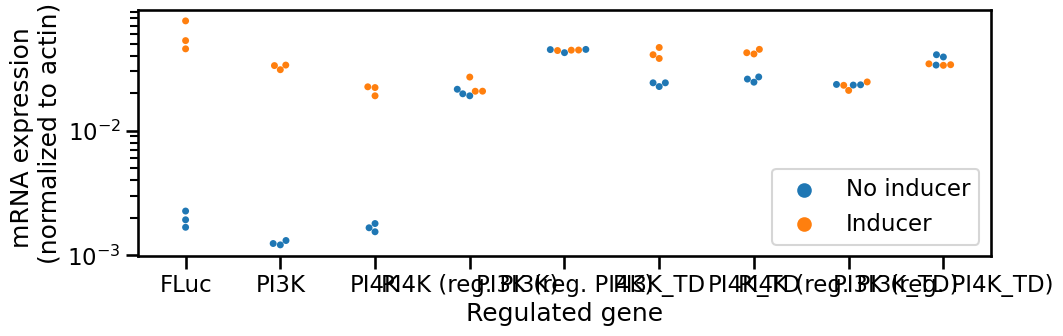

In [6]:
dat_12 = dat.loc[ dat['Hours']==24, ]
dat_12['Inducer'] = (dat_12['IPTG'] > 0)
dat_12['Inducer'] = dat_12['Inducer'].replace(False,'No inducer').replace(True,'Inducer')
# dat_12['IPTG'] = dat_12['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')
dat_12 = dat_12.replace('pPC089','FLuc').replace('pPC127','PI3K').replace('pPC129','PI4K')

plt.figure(figsize=(11,3.2))
sns.set_context("talk")

ax = sns.swarmplot(dat_12,hue='Inducer',y='Expression',x='Line',order=['FLuc','PI3K','PI4K','PI4K (reg. PI3K)','PI3K (reg. PI4K)','PI3K_TD','PI4K_TD','PI4K (reg. PI3K_TD)','PI3K (reg. PI4K_TD)'])
plt.yscale('log')
plt.legend(loc = "lower right")
plt.xlabel('Regulated gene')
plt.ylabel('mRNA expression \n(normalized to actin)')

In [7]:
dat_off = dat.loc[ dat['IPTG']==0 ].groupby(['Hours','Line']).mean().reset_index()
dat_off_len = dat_off.shape[0]
dat_off = pd.concat( [dat_off]*3 )
dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
dat_off = dat_off[['Hours','Line','Replicate','Control','Target','dCp','Expression']]
dat = dat.loc[ dat['IPTG']>0, ]
dat = dat[['Hours','Line','Replicate','Control','Target','dCp','Expression']]
dat = dat.merge( dat_off, how='outer', on=['Hours','Line','Replicate'], suffixes=[None,'_0'] )
dat['Fold change'] = dat['Expression'] / dat['Expression_0']

dat

Target_type,Hours,Line,Replicate,Control,Target,dCp,Expression,Control_0,Target_0,dCp_0,Expression_0,Fold change
0,4,PI3K (reg. PI4K),1,12.980000,18.490000,5.510000,0.021944,13.263333,18.476667,5.213333,0.027043,0.811454
1,4,PI3K (reg. PI4K),2,12.593333,18.710000,6.116667,0.014411,13.263333,18.476667,5.213333,0.027043,0.532892
2,4,PI3K (reg. PI4K),3,12.490000,18.700000,6.210000,0.013508,13.263333,18.476667,5.213333,0.027043,0.499509
3,4,PI4K (reg. PI3K),1,13.013333,18.700000,5.686667,0.019415,12.716667,18.310000,5.593333,0.021667,0.896089
4,4,PI4K (reg. PI3K),2,12.255000,19.210000,6.955000,0.008060,12.716667,18.310000,5.593333,0.021667,0.372002
...,...,...,...,...,...,...,...,...,...,...,...,...
88,72,pPC127,2,11.046667,15.820000,4.773333,0.036567,13.126667,21.370000,8.243333,0.003324,11.001632
89,72,pPC127,3,10.920000,15.636667,4.716667,0.038031,13.126667,21.370000,8.243333,0.003324,11.442357
90,72,pPC129,1,12.270000,17.943333,5.673333,0.019596,19.165556,24.187778,5.022222,0.030779,0.636652
91,72,pPC129,2,12.960000,18.180000,5.220000,0.026830,19.165556,24.187778,5.022222,0.030779,0.871703


In [8]:
dat = dat[['Hours','Line','Fold change']]
dat.groupby(['Hours','Line']).mean().reset_index()

Target_type,Hours,Line,Fold change
0,4,PI3K (reg. PI4K),0.614618
1,4,PI4K (reg. PI3K),0.728375
2,4,pPC089,10.919033
3,4,pPC127,4.276862
4,4,pPC129,2.337854
5,12,PI3K (reg. PI4K),0.967990
6,12,PI4K (reg. PI3K),1.038772
7,12,pPC089,10.914690
8,12,pPC127,3.325139
9,12,pPC129,4.690950


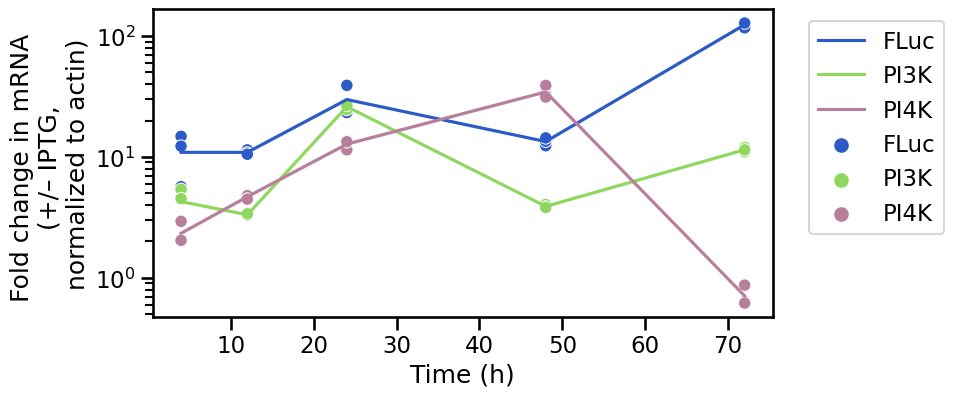

In [9]:
dat_fold = dat.loc[ (dat['Line']=='pPC089') | (dat['Line']=='pPC127') | (dat['Line']=='pPC129'), ]

dat_fold = dat_fold.replace('pPC089','FLuc').replace('pPC127','PI3K').replace('pPC129','PI4K')

plt.figure(figsize=(8,4))
sns.set_context("talk")
ax = sns.lineplot(dat_fold,hue='Line',y='Fold change',x='Hours', errorbar=('ci', 0), palette=['#2a5bc6','#8fd85f','#b87f9d'])
ax = sns.scatterplot(dat_fold,hue='Line',y='Fold change',x='Hours', palette=['#2a5bc6','#8fd85f','#b87f9d'])
plt.yscale('log')
plt.xlabel('Time (h)')
plt.ylabel('Fold change in mRNA \n(+/– IPTG, \nnormalized to actin)')
# ax.get_legend().remove()
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")